In [36]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime
from scipy import optimize
dp = '/home/ebert/jupyter-notebooks/FNode-data'

In [2]:
exp_name = ''
if exp_name:
    exp_date = '_'.join(exp_name.split('_')[:3])
    experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
else:
    experiment_file = ''
q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
print "ivars: {}".format(q.experiments[0]['variable_list'])

name 'fort_exp' is not defined
ivars: [u'iterator']


### if the fit works

In [4]:
sig = []
for i in q.experiments[0]['iterations']:
    results = q.generate_thresholds(itr=i)[0]
    sig.append(results['fit_params'][3]-results['fit_params'][2])

/home/ebert/jupyter-notebooks/FNode/analyses/qdp/QDP/qdp.py:33: RuntimeWarning: divide by zero encountered in divide
  return A0*np.exp(-(x-m0)**2 / (2*s0**2))/np.sqrt(2*np.pi*s0**2) + A1*np.exp(-(x-m1)**2 / (2*s1**2))/np.sqrt(2*np.pi*s1**2)
/home/ebert/jupyter-notebooks/FNode/analyses/qdp/QDP/qdp.py:33: RuntimeWarning: invalid value encountered in divide
  return A0*np.exp(-(x-m0)**2 / (2*s0**2))/np.sqrt(2*np.pi*s0**2) + A1*np.exp(-(x-m1)**2 / (2*s1**2))/np.sqrt(2*np.pi*s1**2)
/usr/local/lib/python2.7/dist-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/ebert/jupyter-notebooks/FNode/analyses/qdp/QDP/qdp.py:29: RuntimeWarning: invalid value encountered in double_scalars
  return 1/(1+A0*s0*(1+special.erf(m0/np.sqrt(2)/s0))/A1/s1/(1+special.erf(m1/np.sqrt(2)/s1)))


<IPython.core.display.Javascript object>


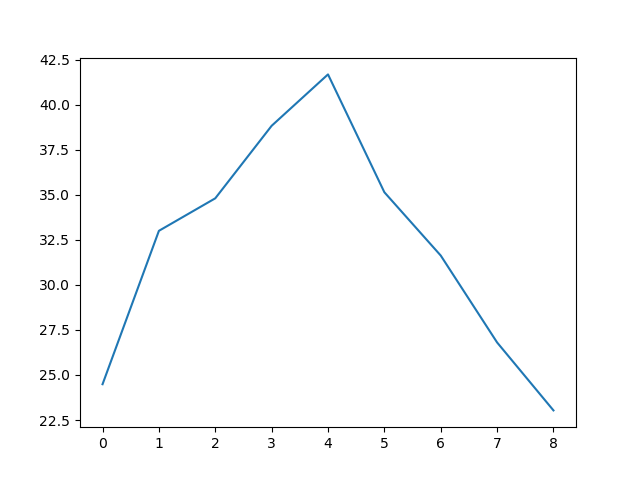

In [6]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(sig)), sig)

In [7]:
sig[4]

41.691767661056019

### if the fit doesnt work

In [16]:
q.experiments[0]['iterations'][0]['quantized_data'].shape

(501, 2, 2)

<IPython.core.display.Javascript object>


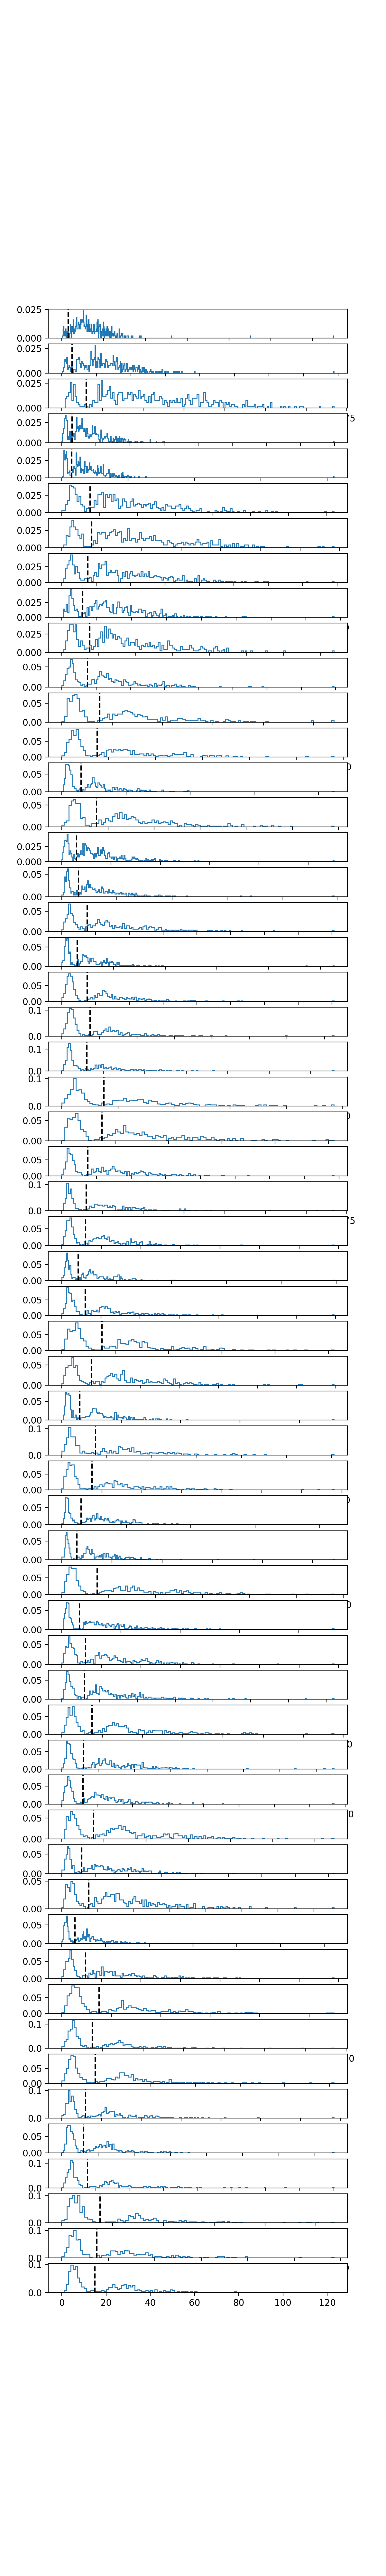

In [15]:
fig, ax = plt.subplots(itrs, figsize=(6,40))
shot = 0
roi = 1
for itr in range(itrs):
    d = q.experiments[0]['iterations'][itr]['signal_data'][:,shot,roi,0]
    ax[itr].hist(d, bins=np.arange(max(d)+1), density=True, histtype='step')
    ax[itr].axvline(x=15, color='k', linestyle='--')

fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 's0_loading_vs_time.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)

In [33]:
# get s0 cuts
cuts = [[20],[2]]
q.set_thresholds(cuts, roi=0)
cuts = [[15],[3]]
q.set_thresholds(cuts, roi=1)
retention = q.apply_thresholds()
itrs = len(q.experiments[0]['iterations'].keys())
s1_cuts = []
loads = []
for itr in range(itrs):
    s1_cuts.append(q.experiments[0]['iterations'][itr]['signal_data'][q.experiments[0]['iterations'][itr]['quantized_data'][:,0,0].astype('bool'),1,0])
    loads.append(float(s1_cuts[-1].shape[0])/500)

no loading observed


In [38]:
def exp(x, a, b, c):
    return a*np.exp(-x/b)+c

<IPython.core.display.Javascript object>


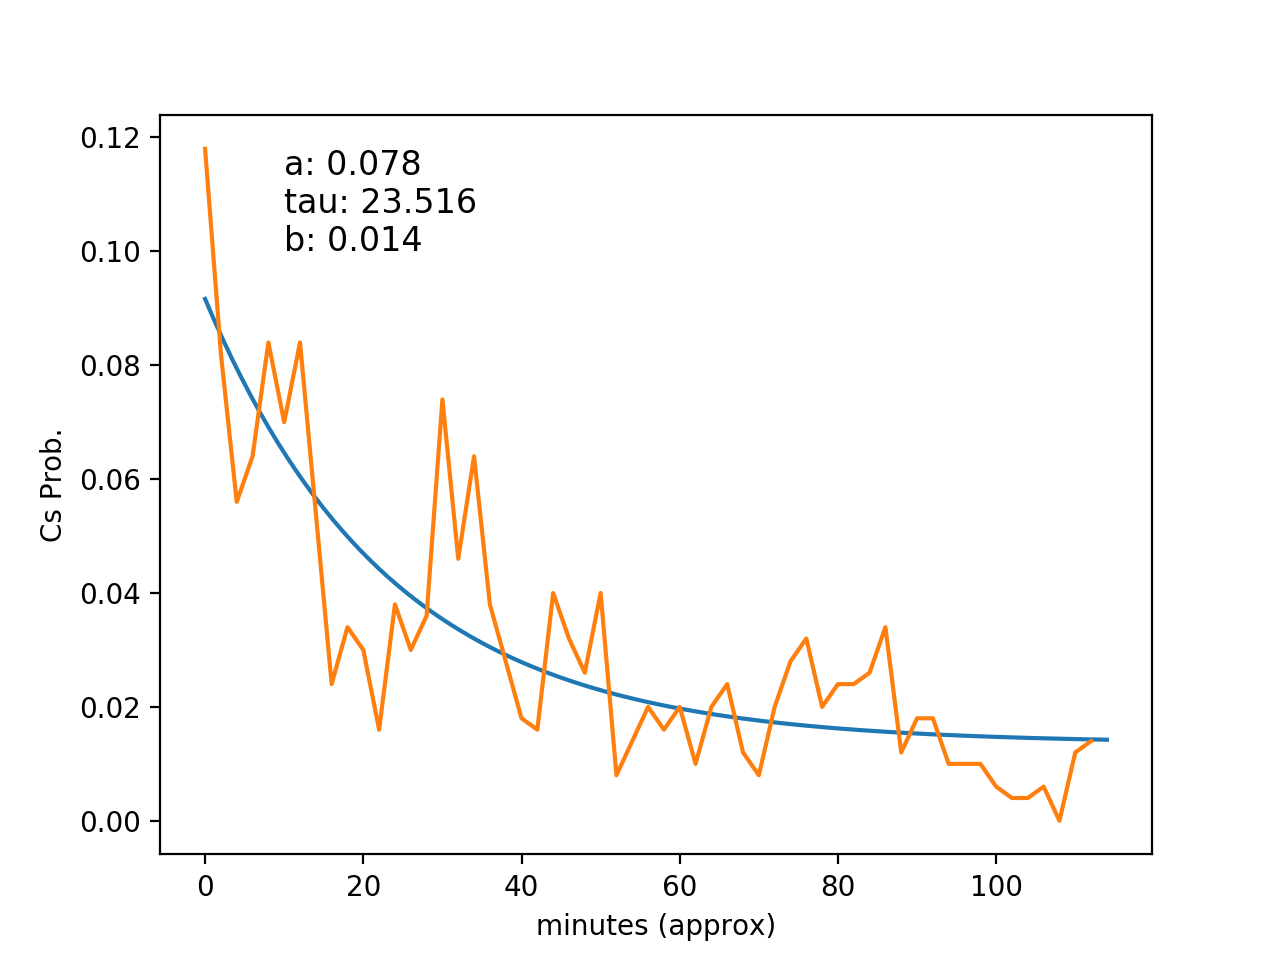

In [46]:
guess = (0.12, 20, 0)
popt, pcov = optimize.curve_fit(
    exp,
    2*np.arange(len(loads)),
    loads,
    p0=guess,
)

fig, ax = plt.subplots()
xs = np.linspace(0,2*len(loads),100)
ax.plot(xs, exp(xs, *popt))
fit_data = "a: {:.3f}\ntau: {:.3f}\nb: {:.3f}"
ax.text(10, 0.1, fit_data.format(*popt), fontsize=12)
ax.set_xlabel("minutes (approx)")
ax.set_ylabel("Cs Prob.")

ax.plot(2*np.arange(len(loads)), loads)

fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 'cs_loading_drop.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)

<IPython.core.display.Javascript object>


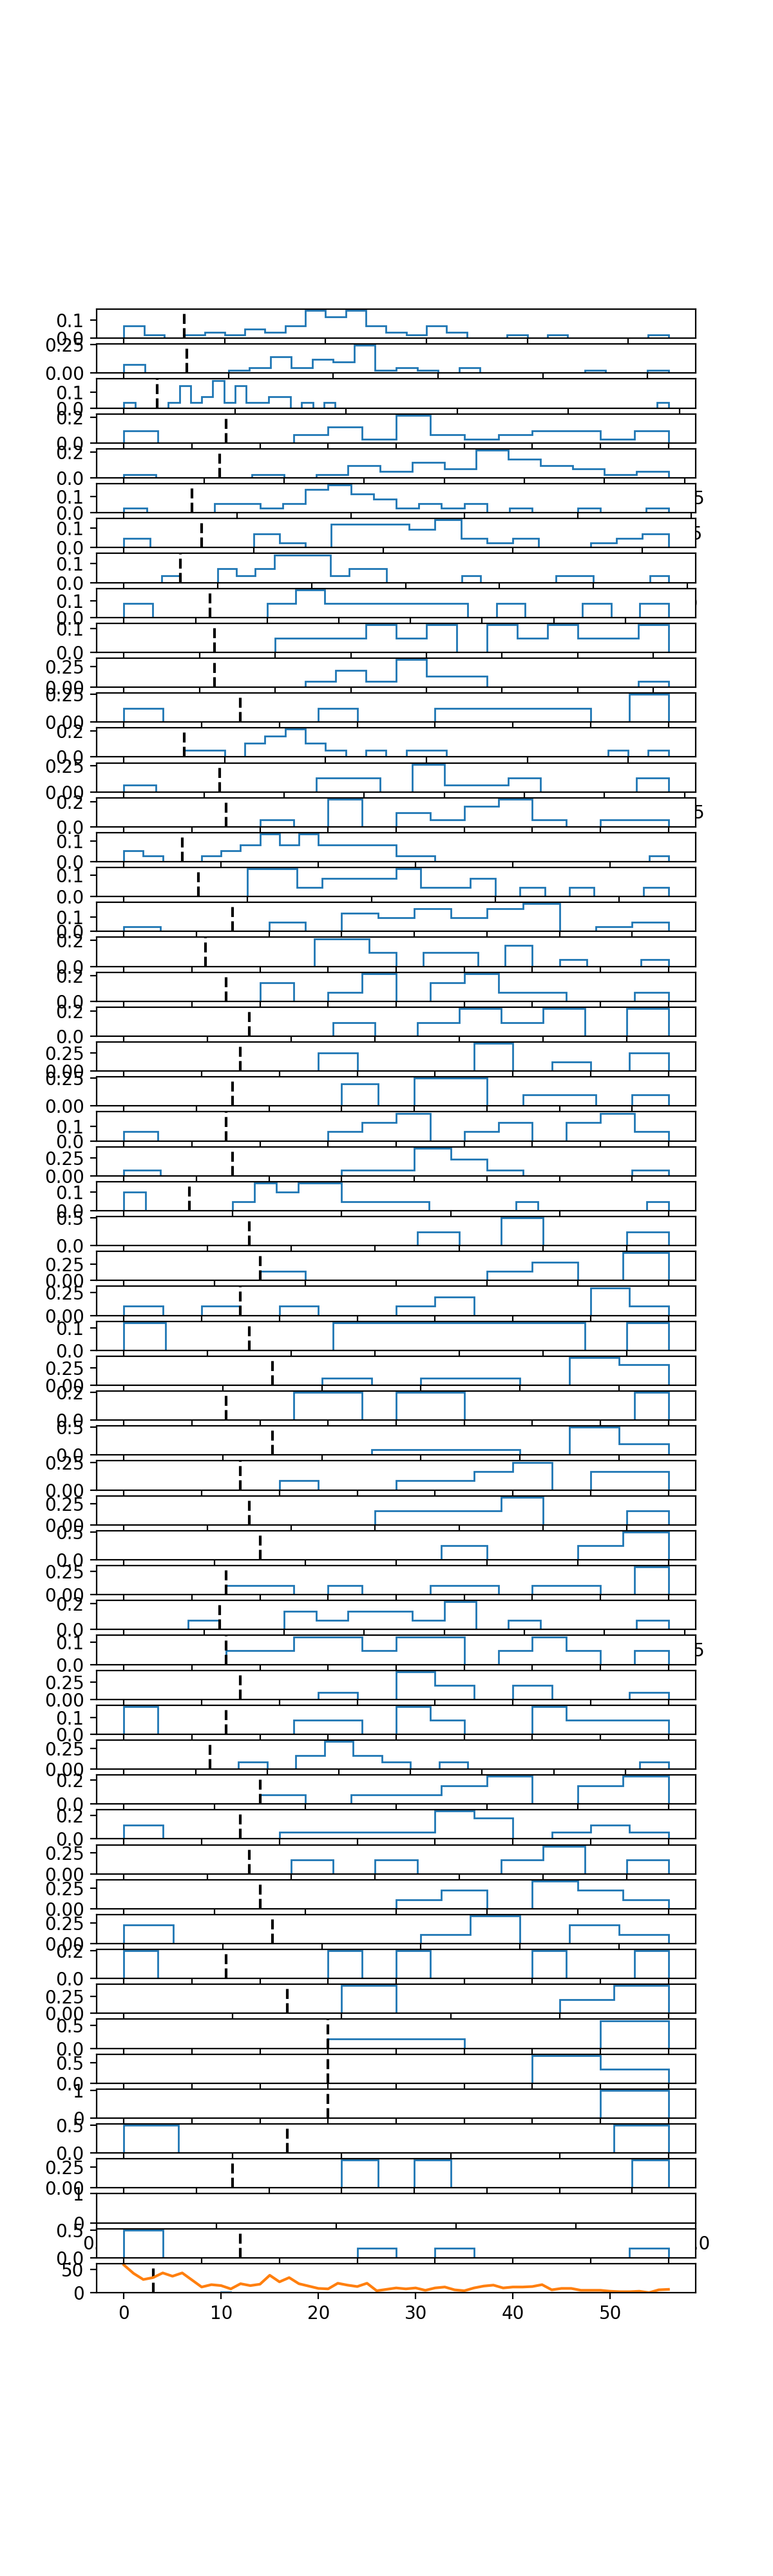

In [25]:
fig, ax = plt.subplots(itrs, figsize=(6,20))
s1_sigs = []
for itr in range(itrs):
    if len(s1_cuts[itr]):
        ax[itr].hist(s1_cuts[itr], bins=np.arange(max(s1_cuts[itr])+1), density=True, histtype='step')
        ax[itr].axvline(x=cuts[1][0], color='k', linestyle='--')
        s1_sigs.append(np.mean(s1_cuts[itr]))

fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 's1_readout_det_scan.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)


#s1_bg = np.mean(s1_nocut)

In [25]:
s1_sigs[3:5]

[9.0198019801980198, 8.9793814432989691]